In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip3 install -r requirements.txt

d:\Weapon Detection Project DRDO\Models\yolo\yolov5


Cloning into 'yolov5'...
C:\Users\PRACHI TEWARI\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


                                              0.0/2.3 MB ? eta -:--:--
     ------                                   0.4/2.3 MB 11.6 MB/s eta 0:00:01
     ------------------------                 1.5/2.3 MB 18.5 MB/s eta 0:00:01
     ---------------------------------------- 2.3/2.3 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\PRACHI TEWARI\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\PRACHI TEWARI/.cache\torch\hub\master.zip
YOLOv5  2024-8-2 Python-3.11.4 torch-2.3.1+cpu CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 21.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 

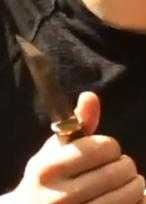

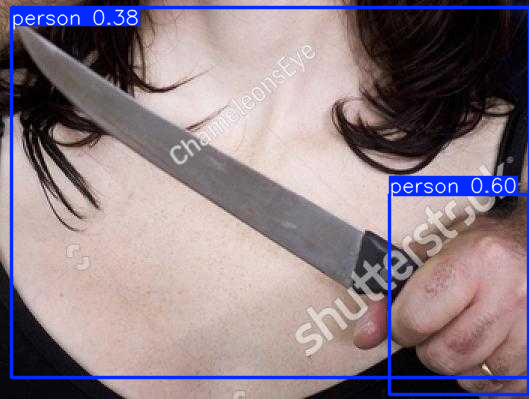

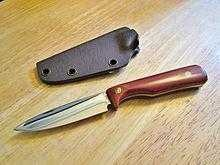

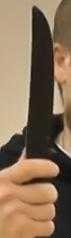

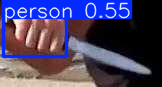

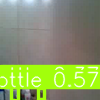

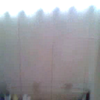

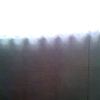

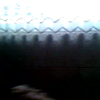

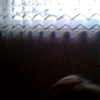

In [2]:
import torch
from matplotlib import pyplot as plt
from PIL import Image
import os

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Define the path to your dataset
positive_folder = r'D:\Weapon Detection Project DRDO\KnivesImagesDatabase\POSITIVES_ALL'
negative_folder = r'D:\Weapon Detection Project DRDO\KnivesImagesDatabase\NEGATIVES_ALL'

# Function to run inference and visualize results
def detect_knives(image_path):
    # Load image
    img = Image.open(image_path)
    
    # Perform inference
    results = model(img)
    
    # Display results
    results.show()
    
    # Return results
    return results

# Detect knives in a positive image
positive_images = os.listdir(positive_folder)
for img_name in positive_images[:5]:  # Just to visualize a few examples
    img_path = os.path.join(positive_folder, img_name)
    detect_knives(img_path)

# Detect knives in a negative image
negative_images = os.listdir(negative_folder)
for img_name in negative_images[:5]:  # Just to visualize a few examples
    img_path = os.path.join(negative_folder, img_name)
    detect_knives(img_path)


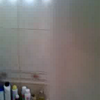

No knife detected in D:\Weapon Detection Project DRDO\KnivesImagesDatabase\NEGATIVES_ALL\10000.bmp


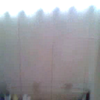

No knife detected in D:\Weapon Detection Project DRDO\KnivesImagesDatabase\NEGATIVES_ALL\10001.bmp


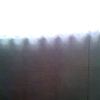

No knife detected in D:\Weapon Detection Project DRDO\KnivesImagesDatabase\NEGATIVES_ALL\10002.bmp


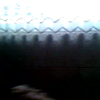

No knife detected in D:\Weapon Detection Project DRDO\KnivesImagesDatabase\NEGATIVES_ALL\10003.bmp


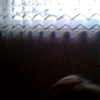

No knife detected in D:\Weapon Detection Project DRDO\KnivesImagesDatabase\NEGATIVES_ALL\10004.bmp


In [6]:
def evaluate_negative(image_path):
    results = detect_knives(image_path)
    detected_objects = results.xyxy[0]  # Bounding box predictions
    if detected_objects.shape[0] == 0:
        print(f"No knife detected in {image_path}")
    else:
        print(f"Knife detected in {image_path}")

for img_name in negative_images[:5]:  # Check a few examples
    img_path = os.path.join(negative_folder, img_name)
    evaluate_negative(img_path)


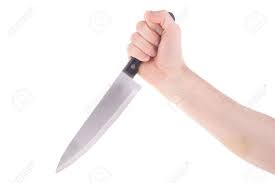

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 183x275 (no detections)
Speed: 9.1ms pre-process, 283.5ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)

In [8]:
# Path to the new image
new_image_path = 'D:\Weapon Detection Project DRDO\images.jpeg'

# Run inference
detect_knives(new_image_path)
